In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.patches as patches
from IPython.display import Audio
from scipy.io.wavfile import write
from datetime import datetime
import subprocess
from pya import *

# Simulation

In [18]:
import simulation

n = 128
sim_speed = 0.004
sim_fps = 400
duration = 6
frame_amount = duration * sim_fps

initial_state = np.array([[simulation.gaussian_impulse(x, y, n, offset=[-0.6, 0.0], width=0.05, impulse=-0.1) for x in range(n)] for y in range(n)])
# initial_state = np.array([[simulation.gaussian(x, y, n, offset=[-0.6, 0.0], width=0.05) for x in range(n)] for y in range(n)]) + np.array([[simulation.gaussian(x, y, n, offset=[-0.62, 0.0], width=0.05, imag=True) for x in range(n)] for y in range(n)])
# potential = np.array([[simulation.parabola(x, y, n, offset=[0, 0], factor=10000) for x in range(n)] for y in range(n)])
potential = np.array([[complex(0, 0) for x in range(n)] for y in range(n)])

multi_slit = [(-15, -13), (-8, -6), (-1, 1), (6, 8), (13, 15)]
double_slit = [(-4, -2), (2, 4)]
single_slit = [(-2, 2)]
slits = double_slit

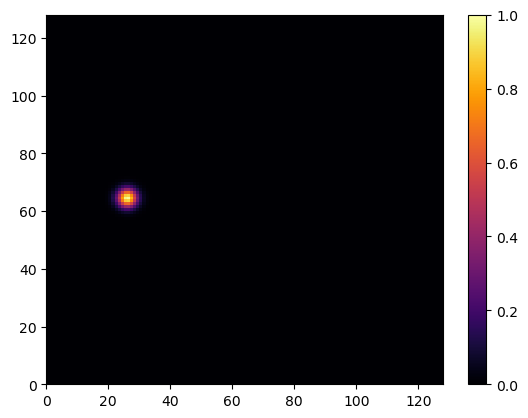

In [19]:
plt.pcolormesh(np.abs(initial_state), cmap='inferno', vmin=0, vmax=1)
# plt.pcolormesh(np.abs(potential), vmin=0, vmax=20000)
plt.colorbar()
plt.show()

In [20]:
# Test "impuls": Gradient für 100 Schritte, evtl. Dirak-Start

frames = simulation.sim(n, sim_fps, duration, slits, sim_speed, initial_state=initial_state, potential=potential)

# Video

In [21]:
# create visual barrier for plot
def visual_barrier(barrier_gaps):
    start = 0
    rects = []
    for g in barrier_gaps:
        end = n//2 + g[0]
        rect = patches.Rectangle((n//2 - 1.5, start - 0.5), 1, end - start, linewidth=0, facecolor='#60b0ff')
        start = n//2 + g[1]
        rects.append(rect)
    rects.append(patches.Rectangle((n//2 - 1.5, start - 0.5), 1, n - start, linewidth=0, facecolor='#60b0ff'))
    return rects

video saved as output/sim_2024_04_22-17_44_16.mp4


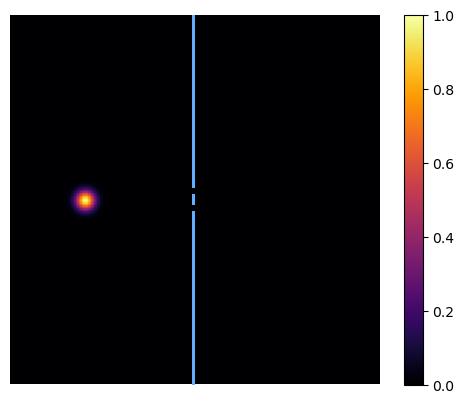

In [22]:
# FuncAnimation
video_fps = 20

fig, ax = plt.subplots()
plt.axis('off')  # big performance boost

data = pow(np.abs(frames[0]), 1)
cax = ax.imshow(data, cmap='inferno', vmin=0, vmax=1)
for b in visual_barrier(slits):
    ax.add_patch(b)
fig.colorbar(cax)  # no performance impact (?)

def animate(i):
    cax.set_array(pow(np.abs(frames[i * sim_fps // video_fps]), 1))

anim = animation.FuncAnimation(fig, animate, frames=frame_amount * video_fps // sim_fps)
video_filename = f'output/sim_{datetime.now().strftime("%Y_%m_%d-%H_%M_%S")}.mp4'

anim.save(video_filename, fps=video_fps, dpi=150, bitrate=4000)

print(f'video saved as {video_filename}')